

## Dane
W projekcie wykorzytsano dane dotyczące lotów samolotowych z 2015 r z kaggle



**Co mozna jeszcze obliczyć:**


1.   Która linia lotnicza odnotowuje największą liczbę opóźnień, w jakich godzinach i dniach tygodnia;

2.  Czy liczba wylotów w danym dniu tygodnia wpływa na  liczbę spóźnień przylotów;






#Importy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from random import sample
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# flights = pd.read_csv('flights.csv') 
flights = pd.read_csv('/content/drive/MyDrive/flights.csv')

#Anliza wstępna

In [ ]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448.0,404.0,4.0,430.0,408.0,-22.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330.0,737.0,4.0,750.0,741.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296.0,800.0,11.0,806.0,811.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342.0,748.0,8.0,805.0,756.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448.0,254.0,5.0,320.0,259.0,-21.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82750,2015,1,6,2,WN,4543,N214WN,MKE,MSP,905,902.0,-3.0,13.0,915.0,85.0,78.0,61.0,297.0,1016.0,4.0,1030.0,1020.0,-10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
82751,2015,1,6,2,WN,1199,N7702A,OAK,BUR,905,900.0,-5.0,12.0,912.0,65.0,67.0,53.0,325.0,1005.0,2.0,1010.0,1007.0,-3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
82752,2015,1,6,2,WN,1963,N741SA,OAK,LAX,905,905.0,0.0,9.0,914.0,75.0,73.0,57.0,337.0,1011.0,7.0,1020.0,1018.0,-2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
82753,2015,1,6,2,WN,4749,N8327A,LAS,FLL,905,907.0,2.0,12.0,919.0,275.0,270.0,254.0,2173.0,1633.0,4.0,1640.0,1637.0,-3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
flights.iloc[:, 3].head()

0    4
1    4
2    4
3    4
4    4
Name: DAY_OF_WEEK, dtype: int64

In [ ]:
# flights['MONTH_DAY'] = pd.to_datetime(flights['YEAR']).dt.to_period('M')
# flights.head()

In [ ]:
len(flights)

82755

In [ ]:
flights_data = flights.sample(n=14000, random_state=5)
flights_data = flights_data[~flights_data['ARRIVAL_DELAY'].isnull()]
flights_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4899,2015,1,1,4,OO,2598,N868CA,LAX,TUS,1140,1133.0,-7.0,15.0,1148.0,85.0,88.0,69.0,451.0,1357.0,4.0,1405.0,1401.0,-4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
45524,2015,1,3,6,DL,1448,N936DL,DTW,LGA,2140,2154.0,14.0,12.0,2206.0,103.0,86.0,66.0,502.0,2312.0,8.0,2323.0,2320.0,-3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
51038,2015,1,4,7,EV,4675,N11199,IAH,JAX,1016,1037.0,21.0,21.0,1058.0,123.0,137.0,97.0,817.0,1335.0,19.0,1319.0,1354.0,35.0,0.0,0.0,NaN,14.0,0.0,21.0,0.0,0.0
48175,2015,1,4,7,UA,1709,N27724,IAH,IAD,730,729.0,-1.0,32.0,801.0,175.0,163.0,125.0,1190.0,1106.0,6.0,1125.0,1112.0,-13.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
36369,2015,1,3,6,AA,1354,N483AA,MCO,DFW,1115,1109.0,-6.0,11.0,1120.0,175.0,173.0,156.0,985.0,1256.0,6.0,1310.0,1302.0,-8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63984,2015,1,5,1,WN,2407,N603SW,BOI,GEG,655,652.0,-3.0,20.0,712.0,70.0,79.0,54.0,287.0,706.0,5.0,705.0,711.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
74967,2015,1,5,1,WN,2705,N783SW,OKC,STL,1735,1750.0,15.0,8.0,1758.0,80.0,72.0,61.0,462.0,1859.0,3.0,1855.0,1902.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
31192,2015,1,3,6,DL,2154,N816DN,LAX,ATL,600,600.0,0.0,18.0,618.0,250.0,259.0,231.0,1947.0,1309.0,10.0,1310.0,1319.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
67657,2015,1,5,1,US,462,N192UW,PHL,SFO,1020,1032.0,12.0,12.0,1044.0,384.0,390.0,369.0,2521.0,1353.0,9.0,1344.0,1402.0,18.0,0.0,0.0,NaN,6.0,0.0,12.0,0.0,0.0


In [ ]:
flights_data.iloc[:, 3]

4899     4
45524    6
51038    7
48175    7
36369    6
        ..
63984    1
74967    1
31192    6
67657    1
42424    6
Name: DAY_OF_WEEK, Length: 13608, dtype: int64

In [ ]:
flights_data.shape

(13608, 31)

#Dane

In [ ]:
flights_data.isnull().mean()

YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.000000
DEPARTURE_DELAY        0.000000
TAXI_OUT               0.000000
WHEELS_OFF             0.000000
SCHEDULED_TIME         0.000000
ELAPSED_TIME           0.000000
AIR_TIME               0.000000
DISTANCE               0.000000
WHEELS_ON              0.000000
TAXI_IN                0.000000
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           0.000000
ARRIVAL_DELAY          0.000000
DIVERTED               0.000000
CANCELLED              0.000000
CANCELLATION_REASON    1.000000
AIR_SYSTEM_DELAY       0.647413
SECURITY_DELAY         0.647413
AIRLINE_DELAY          0.647413
LATE_AIRCRAFT_DELAY    0.647413
WEATHER_DELAY          0.647413
dtype: f

In [ ]:
columns_to_drop = [
                   'YEAR', 
                   'DAY',
                   'FLIGHT_NUMBER',
                   'TAIL_NUMBER', 
                   'AIRLINE_DELAY', 
                   'CANCELLED', 
                   'AIR_SYSTEM_DELAY', 
                   'SECURITY_DELAY', 
                   'LATE_AIRCRAFT_DELAY',
                   'CANCELLATION_REASON',
                   'WEATHER_DELAY', 
                   'DIVERTED', 
                   'ARRIVAL_DELAY', 
                   'ARRIVAL_TIME',
                   'DEPARTURE_DELAY', 
                  
                   'DEPARTURE_DELAY'
                   
                   
                     
                           
          
                   
                   
                   
                 
                  


]
X = flights_data.drop(columns_to_drop, axis = 1)
y = flights_data['ARRIVAL_TIME']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X.groupby(['ORIGIN_AIRPORT','DEPARTURE_TIME']).sum() #pokazuje ile danego dnia tygodnia  z danego lotniska jest odlotów

MONTH  DAY_OF_WEEK  ...  TAXI_IN  SCHEDULED_ARRIVAL
ORIGIN_AIRPORT DEPARTURE_TIME                      ...                            
ABE            552.0               1            4  ...      5.0              753.0
               556.0               1            7  ...      8.0              753.0
               628.0               1            4  ...      3.0              854.0
               1618.0              1            6  ...     12.0             1820.0
               1846.0              1            7  ...      6.0             1835.0
...                              ...          ...  ...      ...                ...
XNA            1839.0              1            7  ...     13.0             1750.0
YAK            1130.0              1            6  ...      4.0             1246.0
YUM            1109.0              1            5  ...      9.0              855.0
               1852.0              1            5  ...      6.0             2002.0
               1909.0              1            4  ...     12.0             2002.0

[11836 rows x 12 columns]

In [ ]:
X.groupby(['ORIGIN_AIRPORT','DAY_OF_WEEK']).sum() #w jakie dni tygodnia  z danego lotniska odbywaja sie loty 

MONTH  ...  SCHEDULED_ARRIVAL
ORIGIN_AIRPORT DAY_OF_WEEK         ...                   
ABE            4                2  ...             1607.0
               6                1  ...             1820.0
               7                2  ...             2588.0
ABI            1                1  ...             1520.0
               5                1  ...             1025.0
...                           ...  ...                ...
XNA            6                4  ...             4919.0
               7                4  ...             5734.0
YAK            6                1  ...             1246.0
YUM            4                1  ...             2002.0
               5                2  ...             2857.0

[1203 rows x 12 columns]

In [ ]:
X.iloc[:, 1]

4899     4
45524    6
51038    7
48175    7
36369    6
        ..
63984    1
74967    1
31192    6
67657    1
42424    6
Name: DAY_OF_WEEK, Length: 13608, dtype: int64

In [ ]:
# result = []

In [ ]:
# delay_threshold = 10
# flights_delayed = []

# for row in flights_data['ARRIVAL_DELAY']:
#     if row > delay_threshold:
#         flights_delayed.append(1) 
#     else:
#         flights_delayed.append(0) ##lot na czas lub ukończony przed czasem 

# flights_data['sum_delays'] = flights_delayed
# flights_data['sum_delays'].value_counts()



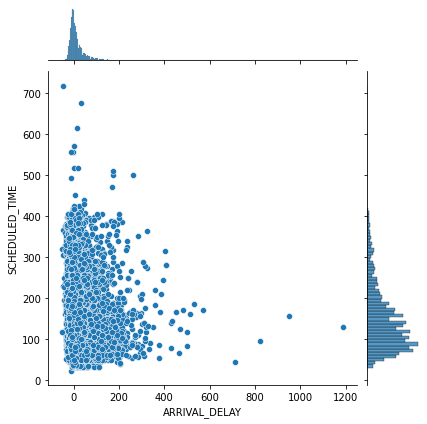

In [ ]:
sns.jointplot(data=flights_data, x="ARRIVAL_DELAY", y="SCHEDULED_TIME")


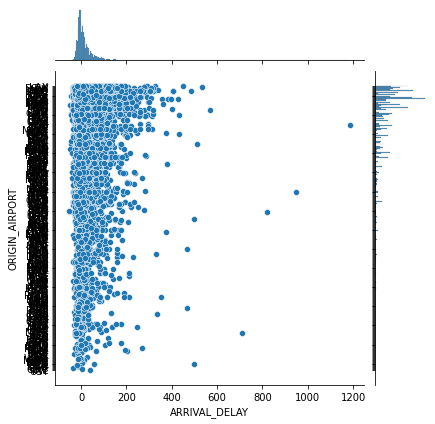

In [ ]:
sns.jointplot(data=flights_data, x="ARRIVAL_DELAY", y="ORIGIN_AIRPORT")

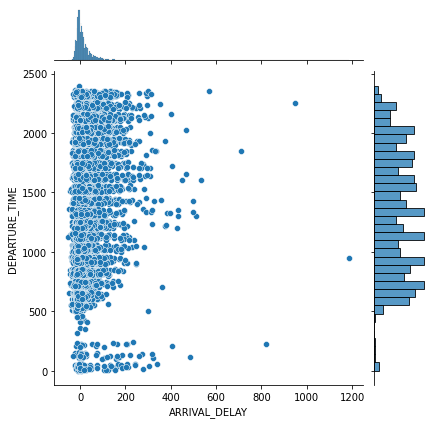

In [ ]:
sns.jointplot(data=flights_data, x="ARRIVAL_DELAY", y="DEPARTURE_TIME")

In [ ]:
X.sort_values('AIRLINE',ascending=True)
X.sort_index(axis=1)

,AIRLINE,AIR_TIME,DAY_OF_WEEK,DEPARTURE_TIME,DESTINATION_AIRPORT,DISTANCE,ELAPSED_TIME,MONTH,ORIGIN_AIRPORT,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE,SCHEDULED_TIME,TAXI_IN,TAXI_OUT,WHEELS_OFF,WHEELS_ON
4899,OO,69.0,4,1133.0,TUS,451.0,88.0,1,LAX,1405.0,1140,85.0,4.0,15.0,1148.0,1357.0
45524,DL,66.0,6,2154.0,LGA,502.0,86.0,1,DTW,2323.0,2140,103.0,8.0,12.0,2206.0,2312.0
51038,EV,97.0,7,1037.0,JAX,817.0,137.0,1,IAH,1319.0,1016,123.0,19.0,21.0,1058.0,1335.0
48175,UA,125.0,7,729.0,IAD,1190.0,163.0,1,IAH,1125.0,730,175.0,6.0,32.0,801.0,1106.0
36369,AA,156.0,6,1109.0,DFW,985.0,173.0,1,MCO,1310.0,1115,175.0,6.0,11.0,1120.0,1256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63984,WN,54.0,1,652.0,GEG,287.0,79.0,1,BOI,705.0,655,70.0,5.0,20.0,712.0,706.0
74967,WN,61.0,1,1750.0,STL,462.0,72.0,1,OKC,1855.0,1735,80.0,3.0,8.0,1758.0,1859.0
31192,DL,231.0,6,600.0,ATL,1947.0,259.0,1,LAX,1310.0,600,250.0,10.0,18.0,618.0,1309.0
67657,US,369.0,1,1032.0,SFO,2521.0,390.0,1,PHL,1344.0,1020,384.0,9.0,12.0,1044.0,1353.0


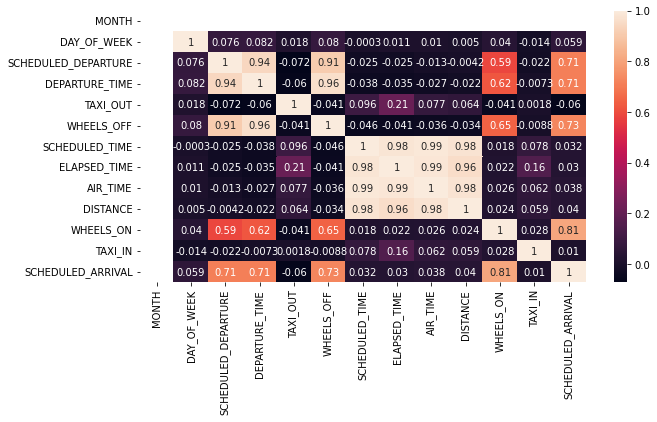

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(),annot=True)



In [ ]:
flights_data[flights_data.columns[1:]].corr()['ARRIVAL_TIME'][:].sort_values(ascending=False)

ARRIVAL_TIME           1.000000
WHEELS_ON              0.956858
SCHEDULED_ARRIVAL      0.783930
WHEELS_OFF             0.610655
DEPARTURE_TIME         0.583574
SCHEDULED_DEPARTURE    0.552908
ARRIVAL_DELAY          0.066598
DEPARTURE_DELAY        0.065649
DAY_OF_WEEK            0.036930
LATE_AIRCRAFT_DELAY    0.029111
TAXI_IN                0.028475
AIR_TIME               0.021919
ELAPSED_TIME           0.018547
DISTANCE               0.018405
SCHEDULED_TIME         0.015042
FLIGHT_NUMBER         -0.012696
SECURITY_DELAY        -0.022051
TAXI_OUT              -0.039403
AIR_SYSTEM_DELAY      -0.050948
AIRLINE_DELAY         -0.062823
WEATHER_DELAY         -0.078809
DAY                   -0.102331
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_TIME, dtype: float64

In [ ]:
flights_data.isnull().mean()

YEAR                   0.000000
MONTH                  0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
TAIL_NUMBER            0.000000
ORIGIN_AIRPORT         0.000000
DESTINATION_AIRPORT    0.000000
SCHEDULED_DEPARTURE    0.000000
DEPARTURE_TIME         0.000000
DEPARTURE_DELAY        0.000000
TAXI_OUT               0.000000
WHEELS_OFF             0.000000
SCHEDULED_TIME         0.000000
ELAPSED_TIME           0.000000
AIR_TIME               0.000000
DISTANCE               0.000000
WHEELS_ON              0.000000
TAXI_IN                0.000000
SCHEDULED_ARRIVAL      0.000000
ARRIVAL_TIME           0.000000
ARRIVAL_DELAY          0.000000
DIVERTED               0.000000
CANCELLED              0.000000
CANCELLATION_REASON    1.000000
AIR_SYSTEM_DELAY       0.647413
SECURITY_DELAY         0.647413
AIRLINE_DELAY          0.647413
LATE_AIRCRAFT_DELAY    0.647413
WEATHER_DELAY          0.647413
dtype: f

#Pipeline

In [ ]:
X

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL
4899,1,4,OO,LAX,TUS,1140,1133.0,15.0,1148.0,85.0,88.0,69.0,451.0,1357.0,4.0,1405.0
45524,1,6,DL,DTW,LGA,2140,2154.0,12.0,2206.0,103.0,86.0,66.0,502.0,2312.0,8.0,2323.0
51038,1,7,EV,IAH,JAX,1016,1037.0,21.0,1058.0,123.0,137.0,97.0,817.0,1335.0,19.0,1319.0
48175,1,7,UA,IAH,IAD,730,729.0,32.0,801.0,175.0,163.0,125.0,1190.0,1106.0,6.0,1125.0
36369,1,6,AA,MCO,DFW,1115,1109.0,11.0,1120.0,175.0,173.0,156.0,985.0,1256.0,6.0,1310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63984,1,1,WN,BOI,GEG,655,652.0,20.0,712.0,70.0,79.0,54.0,287.0,706.0,5.0,705.0
74967,1,1,WN,OKC,STL,1735,1750.0,8.0,1758.0,80.0,72.0,61.0,462.0,1859.0,3.0,1855.0
31192,1,6,DL,LAX,ATL,600,600.0,18.0,618.0,250.0,259.0,231.0,1947.0,1309.0,10.0,1310.0
67657,1,1,US,PHL,SFO,1020,1032.0,12.0,1044.0,384.0,390.0,369.0,2521.0,1353.0,9.0,1344.0


In [ ]:
X.groupby(['AIRLINE', 'DEPARTURE_TIME']).sum() #pokazuje ile lotów ma dana linia lotnicza w danym dniu tygodnia 



MONTH  DAY_OF_WEEK  ...  TAXI_IN  SCHEDULED_ARRIVAL
AIRLINE DEPARTURE_TIME                      ...                            
AA      2.0                 1            4  ...      4.0              750.0
        3.0                 1            4  ...      8.0             2350.0
        6.0                 1            5  ...      4.0              750.0
        8.0                 1            4  ...      7.0             2310.0
        15.0                1            5  ...      6.0              805.0
...                       ...          ...  ...      ...                ...
WN      2322.0              1            7  ...      9.0             2250.0
        2332.0              2            2  ...     10.0             4440.0
        2334.0              1            7  ...      4.0             2235.0
        2341.0              1            1  ...      3.0             2325.0
        2357.0              1            7  ...      5.0             2215.0

[7576 rows x 12 columns]

In [ ]:
X.groupby(['AIRLINE', 'DAY_OF_WEEK']).count()

MONTH  ORIGIN_AIRPORT  ...  TAXI_IN  SCHEDULED_ARRIVAL
AIRLINE DAY_OF_WEEK                         ...                            
AA      1              252             252  ...      252                252
        2               56              56  ...       56                 56
        4              232             232  ...      232                232
        5              274             274  ...      274                274
        6              220             220  ...      220                220
...                    ...             ...  ...      ...                ...
WN      2              158             158  ...      158                158
        4              455             455  ...      455                455
        5              594             594  ...      594                594
        6              582             582  ...      582                582
        7              587             587  ...      587                587

[84 rows x 14 columns]

In [ ]:
numeric_columns = [
                  
                   'MONTH',
                   'DAY_OF_WEEK',
                   'SCHEDULED_DEPARTURE',
                   'DEPARTURE_TIME',
                   'TAXI_OUT',
                   'WHEELS_OFF',
                   'ELAPSED_TIME',
                   'AIR_TIME',
                   'DISTANCE',
                   'TAXI_IN',
                   'WHEELS_ON',
                   'SCHEDULED_ARRIVAL', 
                   'SCHEDULED_TIME',
                   
                 
                   
]

string_columns = [
                  'AIRLINE',
                  'ORIGIN_AIRPORT',
                  'DESTINATION_AIRPORT',
]

preprocessing = ColumnTransformer(
    [
      ('numeric_imputer', SimpleImputer(strategy='median'), numeric_columns),
     
      # ('string_imputer', SimpleImputer(strategy = 'most_frequent'), string_columns),
      ('PowerTransformer', PowerTransformer(), numeric_columns),
      ('RFECV', RFECV(estimator=LinearRegression()), numeric_columns),
      
      ('standard_scaler', StandardScaler(), numeric_columns),
      ('one_hot_encoding', OneHotEncoder(sparse=False, handle_unknown = 'ignore'), string_columns)
    ]
)

In [ ]:
pipeline = Pipeline(
  [
   ('preprocessing', preprocessing),
   ('estimator', LinearRegression()),   
  ]
)

**Podział danych na zbiór treninogowy i testowy**

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
y_train.isnull().sum()

0

In [ ]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(13608, 16) (13608,)
(10206, 16) (10206,)
(3402, 16) (3402,)


In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['MONTH', 'DAY_OF_WEEK',
                                                   'SCHEDULED_DEPARTURE',
                                                   'DEPARTURE_TIME', 'TAXI_OUT',
                                                   'WHEELS_OFF', 'ELAPSED_TIME',
                                                   'AIR_TIME', 'DISTANCE',
                                                   'TAXI_IN', 'WHEELS_ON',
                                                   'SCHEDULED_ARRIVAL',
                                                   'SCHEDULED_TIME']),
                                                 ('PowerTransformer',
                                                  PowerTransformer(),
                                                  ['MONTH', '...
    

In [ ]:
pipeline.predict(X_test)

array([1723.82446289, 2072.07446289,  762.19946289, ..., 1493.57446289,
       1558.82446289, 1548.94946289])

In [ ]:
pipeline.score(X_test, y_test)

-4106857.778516173

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

#Ocena zestawu testowego i treningowego

In [ ]:
y_pred_train = pipeline.predict(X_train)

In [ ]:
y_pred_test = pipeline.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train)


0.9335363925177727

In [ ]:
r2_score(y_test, y_pred_test)


-4106857.778516173

In [ ]:
mean_squared_error(y_train, y_pred_train)

19647.82557140133

In [ ]:
mean_squared_error(y_test, y_pred_test)

1199744488042.518

In [ ]:
np.sqrt(mean_squared_error(y_train, y_pred_train))

140.17070154422902

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred_test))

1095328.484082523